In [77]:
# imports

from bs4 import BeautifulSoup
import lxml.html as lh
import pandas as pd
import numpy as np
import requests 
import seaborn as sns
import matplotlib.pyplot as plt




import data

In [78]:
#bom
bom=pd.read_csv("bom.movie_gross.csv.gz") # 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
bom.info()
bom.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [79]:
#imdb

imdb_name=pd.read_csv('imdb.name.basics.csv.gz') # nconst', 'primary_name', 'birth_year', 'death_year','primary_profession', 'known_for_titles'
imdb_name.columns
imdb_aka=pd.read_csv('imdb.title.akas.csv.gz') # title_id', 'ordering', 'title', 'region', 'language', 'types','attributes', 'is_original_title
imdb_aka.columns
imdb_basics=pd.read_csv('imdb.title.basics.csv.gz') # tconst', 'primary_title', 'original_title', 'start_year','runtime_minutes', 'genres'
imdb_basics.columns
imdb_crew=pd.read_csv('imdb.title.crew.csv.gz') # tconst', 'directors', 'writers
imdb_crew.columns
imdb_prin=pd.read_csv('imdb.title.principals.csv.gz') # tconst', 'ordering', 'nconst', 'category', 'job', 'characters
imdb_prin.columns
imdb_rating=pd.read_csv('imdb.title.ratings.csv.gz') # tconst', 'averagerating', 'numvotes
imdb_rating.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [80]:
#rt
rt_info=pd.read_csv('rt.movie_info.tsv.gz', sep='\t', encoding='latin_1') # id', 'synopsis', 'rating', 'genre', 'director', 'writer','theater_date', 'dvd_date', 'currency', 'box_office', 'runtime','studio
rt_info.columns
rt_review=pd.read_csv('rt.reviews.tsv.gz',sep='\t', encoding='latin_1') # id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher','date'
rt_review.columns
rt_review


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [81]:
#tmdb
tmdb_movie=pd.read_csv('tmdb.movies.csv.gz') # genre_ids', 'id', 'original_language', 'original_title','popularity', 'release_date', 'title', 'vote_average', 'vote_count
tmdb_movie.columns
tmdb_movie


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [82]:
#tn
tn_budget=pd.read_csv('tn.movie_budgets.csv.gz') # id', 'release_date', 'movie', 'production_budget', 'domestic_gross','worldwide_gross'
tn_budget.info()
tn_budget.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

data merge/cleaning



In [83]:
bom #not much data so ignore




,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Text(0.5, 1.0, 'Avg. Rating vs Rumtime(minutes)')

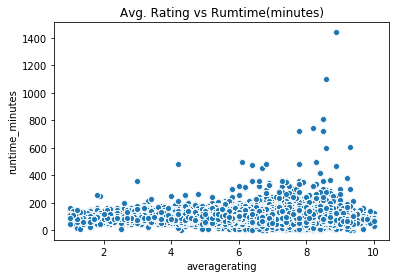

In [84]:
#imdb

#merge tconst df's

imdb1=pd.merge(imdb_crew,imdb_prin,how='outer',on='tconst') #merge crew and prin on tconst
# imdb1
imdb2=pd.merge(imdb1,imdb_rating,how='outer',on='tconst')#merge imdb1 and rating on tconst
# imdb2
imdb3= pd.merge(imdb2,imdb_basics,how='outer',on='tconst') #merge imdb2 and basics on tconst
#imdb3
imdb_aka #title_id should = tconst
imdb4= pd.merge(imdb3,imdb_aka,how='outer',left_on= 'tconst', right_on='title_id')
imdb4
imdb4.info
# no box office or budget info so use rating as proxy

# compare time and avg rating in new dataframe
time_v_rating=imdb4.loc[:,['averagerating','runtime_minutes']]
time_v_rating=time_v_rating.dropna()
time_v_rating

#get their correlation
time_rating=np.corrcoef(time_v_rating['averagerating'], time_v_rating['runtime_minutes'])
time_rating
time_rating_cor=time_rating[0][1] # correlation=0.026
time_rating_cor

# graph results
# sns.scatterplot(x=time_v_rating['averagerating'],y=time_v_rating['runtime_minutes'])
time_v_rating_abrdg=time_v_rating[time_v_rating['runtime_minutes']<10000] # exclude 2 biggest outliers
sns.scatterplot(x=time_v_rating_abrdg['averagerating'],y=time_v_rating_abrdg['runtime_minutes']).set_title('Avg. Rating vs Rumtime(minutes)')  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Movie Box Office (median) $ by Rating')

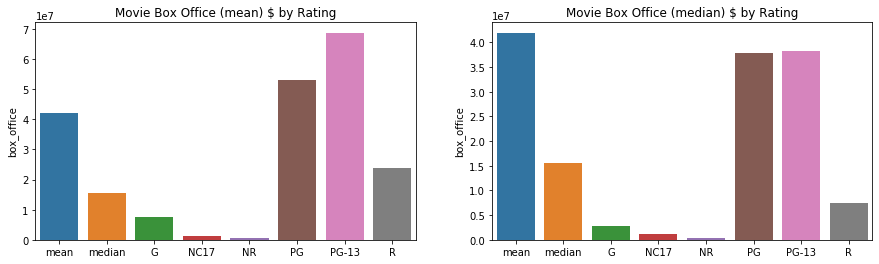

In [85]:
#rt
rt_info
rt_review

# rt info cleaning
#rt_info.info()
rt_info_na=rt_info.dropna()
rt_info_na.info()
rt_info_na. columns # id', 'synopsis', 'rating', 'genre', 'director', 'writer','theater_date', 'dvd_date', 'currency', 'box_office', 'runtime','studio'
rt_info_na['box_office']=rt_info_na['box_office'].str.replace(',','').astype(float) #convert box office data to float 

# rt_info_na.info()
rating_box_office=rt_info_na.groupby('rating').mean() # group by move rating and mean box office
rating_box_office2=rt_info_na.groupby('rating').median() # group by move rating and median box office

# rt_info_na.describe()
rt_info_na_dist=rt_info_na.describe().iloc[[1,5]] #get mean and medain box office data
# rt_info_na_dist
# rating_box_office

# add mean and median box office data to rating sorted data
rating_data=pd.concat([rt_info_na_dist,rating_box_office]) 
rating_data2=pd.concat([rt_info_na_dist,rating_box_office2])

#drop id data from both mean and median data
rating_data=rating_data.drop('id',axis=1)
rating_data2=rating_data2.drop('id',axis=1)

#change row name to median
rating_data=rating_data.rename(index={'50%':'median'})
rating_data2=rating_data2.rename(index={'50%':'median'})

#plot both mean and median data
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
sns.barplot(x=rating_data.index,y=rating_data['box_office'],ax=axs[0]).set_title('Movie Box Office (mean) $ by Rating') #using mean data
sns.barplot(x=rating_data.index,y=rating_data2['box_office'],ax=axs[1]).set_title('Movie Box Office (median) $ by Rating') # using median data



/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

1646

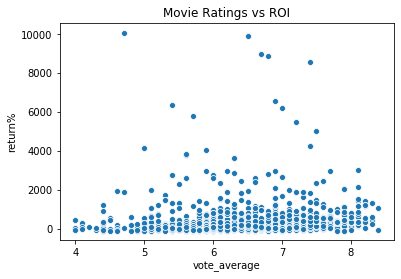

In [86]:
#tmdb

# tmdb_movie
# tn_budget
# tmdb_movie.info()
# tn_budget.info()

#look for best column to merge data
m1=pd.merge(tmdb_movie,tn_budget ,left_on= 'original_title', right_on='movie')
m2=pd.merge(tmdb_movie,tn_budget ,left_on= 'title', right_on='movie')
m1 #2316 results
m2 #2385 results
tmdb_movie_budgets=m2

 # get movies with at least 100 votes
# tmdb_movie_budgets.info()
tmdb_movie_budgets=tmdb_movie_budgets[tmdb_movie_budgets['vote_count']>100]

# convert financial data to numbers(floats)
tmdb_movie_budgets['production_budget']=tmdb_movie_budgets['production_budget'].str.replace(',','').str.replace('$','').astype(float)
tmdb_movie_budgets['worldwide_gross'] = tmdb_movie_budgets['worldwide_gross'].str.replace(',','').str.replace('$','').astype(float)

#create new column to get movie's return on investment (assuming the budget is the investment and the gross is revenue)
tmdb_movie_budgets['return%']= ((tmdb_movie_budgets['worldwide_gross']/tmdb_movie_budgets['production_budget'])-1)*100

# tmdb_movie_budgets.info()
# tmdb_movie_budgets

# create new dataframe with just votes and return data
rating_roi=tmdb_movie_budgets.loc[:,['vote_average','return%']]

#get correlation between movie average vote and return
correl=np.corrcoef(rating_roi['vote_average'],rating_roi['return%'])
correl=correl[0][1] 
correl # 0.030784734541907957 effectivly no correlation


#original graph
# sns.scatterplot(x=rating_roi['vote_average'],y=rating_roi['return%'])

# exclude outliers (3 data points)
rating_roi2=rating_roi[(rating_roi['return%']<20000) & (rating_roi['vote_average']>3.5)]


#new graph without most extreme outliers
sns.scatterplot(x=rating_roi2['vote_average'],y=rating_roi2['return%']).set_title('Movie Ratings vs ROI')

len(rating_roi2['vote_average'])



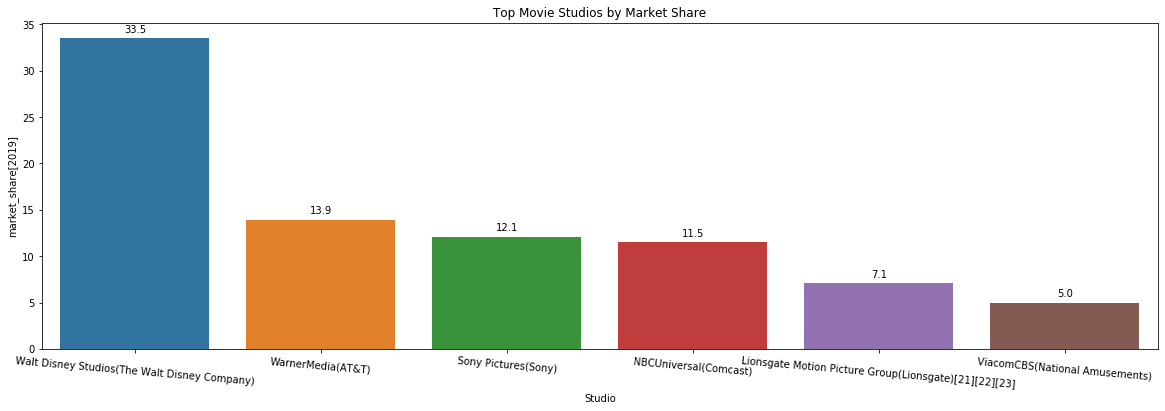

In [87]:
#Get market share data from wikipedia

#get market share table
market_share=pd.read_html('https://en.wikipedia.org/wiki/Major_film_studios')
market_share

#combine tables with relivant data
market_table=pd.concat([market_share[0],market_share[1]],ignore_index=True)
market_table_col=list(market_table.columns)
market_table

#drop irrelevant and erroneous data
del market_table_col[0:2]
del market_table_col[-1]
del market_table_col[-3]
market_table=market_table.drop(columns=market_table_col)

#change column names
market_table=market_table.rename({'Studio parent(conglomerate)':'Studio','Major film studio unit Secondary studio':'subsidiaries','US/CA market share (2019)':'market_share[2019]'},axis='columns')
market_table

#change data from wronge column
market_table['market_share[2019]'][5]='7.07%'
market_table

#drop more bad and missing data
market_table=market_table.drop(columns='US/CA market share (2019)[20]')
market_table=market_table.drop(index=list(range(6,13)))
market_table

# convert number strings to floats
market_table['market_share[2019]']= [i[:-1] for i in market_table['market_share[2019]']]
market_table['market_share[2019]'] = market_table['market_share[2019]'].astype(float)

market_table
market_table=market_table.sort_values('market_share[2019]',ascending=False) #sort by market share

plt.figure(figsize=(20,6))
bars=sns.barplot(x=market_table['Studio'],y=market_table['market_share[2019]'])
bars.set_title('Top Movie Studios by Market Share')
bars.set_xticklabels(bars.get_xticklabels(), rotation=-5, horizontalalignment='center')
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

,Net_margin,Operating_margin,Return_on_assets,Return_on_equity
Comcast,10.91,19.03,4.80,14.19
ViacomCBS,5.16,15.75,6.96,16.42
AT&T,6.84,16.74,3.35,6.80
Disney,-1.58,9.43,1.97,-0.87
Sony,7.99,0.00,2.37,14.72
Lions_Gate,-2.23,4.96,1.43,-3.47


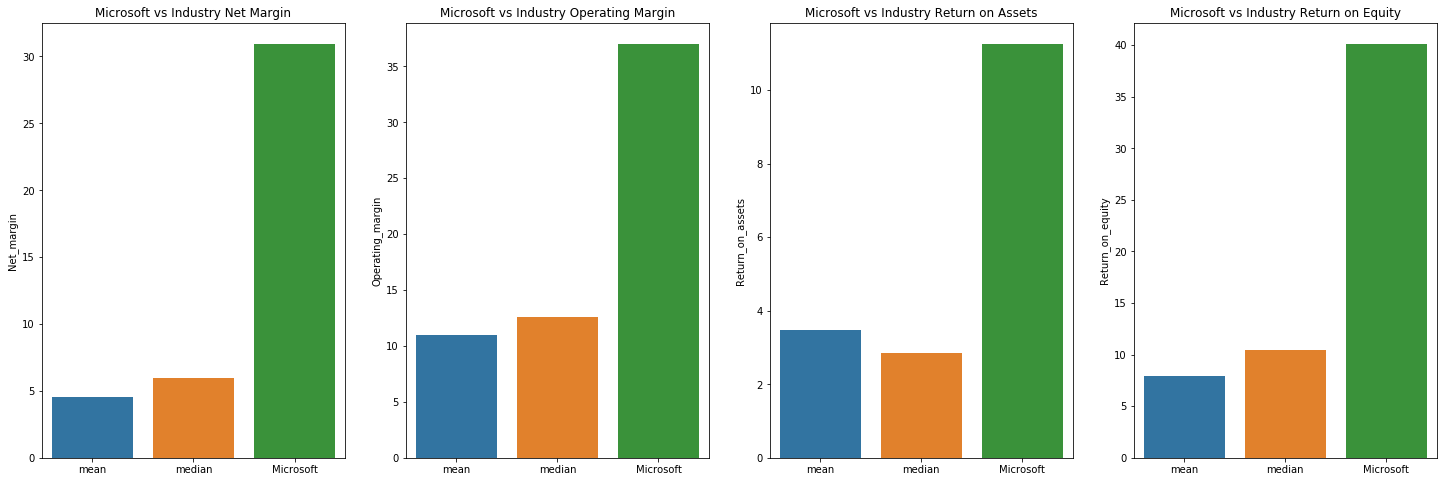

In [88]:
# More details on top movie studios


top_companies=['msft','cmcsa','viac','t','dis','sne','lgf-a'] #ticker symbols for top studios

#catagories of data
net={'Net_margin':[]}
operating={'Operating_margin':[]}
roa={'Return_on_assets':[]}
roe={'Return_on_equity':[]}


# get net and operating margins and ROA and ROE for all 'top companies' using yahoo finance and 'read_html'
for i in top_companies: 
# get data from respective url    
  site= 'https://finance.yahoo.com/quote/'+i+'/key-statistics?p='+i
  tables=pd.read_html(site)
# add data to relevant dictionary 
  temp=tables[5]
  net['Net_margin'].append(temp[1][0])
  operating['Operating_margin'].append(temp[1][1])
  temp=tables[6]
  roa['Return_on_assets'].append(temp[1][0])
  roe['Return_on_equity'].append(temp[1][1])

#combine data
margins = dict(net, **operating,**roa,**roe)

#turn all the above data into a dataframe
data=pd.DataFrame(margins,index=['Microsoft','Comcast','ViacomCBS','AT&T','Disney','Sony','Lions_Gate']) 

# convert the data to floats
for j in data.columns:
  data[j]= [i[:-1] for i in data[j]]
  data[j]=data[j].astype(float)
    
data # table of all data on microsft and competion
industry=data[1:] #industry data excluding microsoft 
    
# add mean and median descriptive statistics
#drom microsoft from average and median
comps=data.iloc[1:].describe().iloc[1:]
#add back microsoft
comps2=comps.append(data.iloc[0])
comps2
# select relevant data from table (microsoft and industry mean and median)
comps3=comps2.iloc[[0,4,-1]]
#rename 50% as median
comps4=comps3.rename(index={'50%':'median'})
comps4

# bar graphs comparing them all
fig, axs = plt.subplots(ncols=4,figsize=(25,8))
sns.barplot(x=comps4.index,y=comps3['Net_margin'],ax=axs[0]).set_title('Microsoft vs Industry Net Margin')
sns.barplot(x=comps4.index,y=comps3['Operating_margin'],ax=axs[1]).set_title('Microsoft vs Industry Operating Margin')
sns.barplot(x=comps4.index,y=comps3['Return_on_assets'],ax=axs[2]).set_title('Microsoft vs Industry Return on Assets')
sns.barplot(x=comps4.index,y=comps3['Return_on_equity'],ax=axs[3]).set_title('Microsoft vs Industry Return on Equity')

data
industry

In [89]:
#install and import Yahoo Finance library 
!pip install yfinance
import yfinance as yf



[*********************100%***********************]  7 of 7 completed
[('VIAC', 'Adj Close'), ('MSFT', 'Adj Close'), ('T', 'Adj Close'), ('DIS', 'Adj Close'), ('SNE', 'Adj Close'), ('LGF-A', 'Adj Close'), ('CMCSA', 'Adj Close')]
                 VIAC       MSFT          T        DIS        SNE      LGF-A  \
            Adj Close  Adj Close  Adj Close  Adj Close  Adj Close  Adj Close   
Date                                                                           
2019-12-06  -2.790011   1.213898   0.026188   0.149223   0.138047   0.422833   
2019-12-09  -5.433196   0.953790  -0.392768  -0.834225   1.119637   1.162787   
2019-12-10  -7.929526   0.800388  -0.340392  -0.908842   1.702459  -1.691330   
2019-12-11  -8.737150   1.180548  -0.052366   0.101738   2.055230  -1.057086   
2019-12-12  -7.537939   2.207705   0.418956   0.217041   3.251542   5.813955   
...               ...        ...        ...        ...        ...        ...   
2020-08-19 -32.128303  40.977868 -18.328383 -12.8218

Text(0.5, 1.0, 'Microsoft & Movie Industry Stock Performance (% change)')

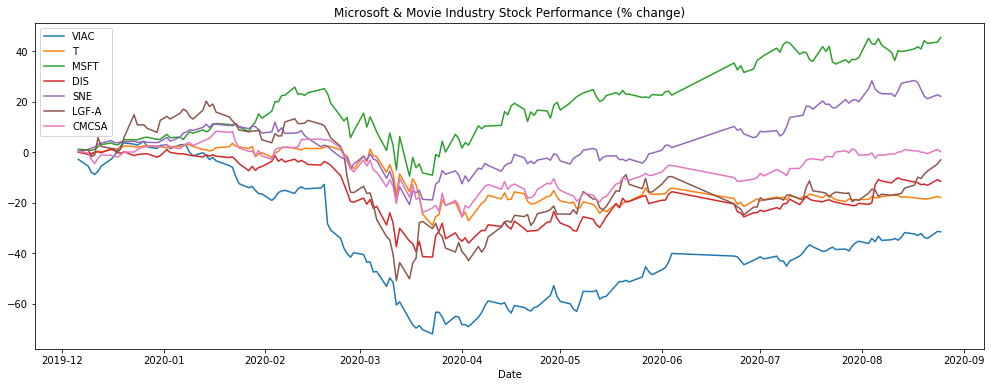

In [90]:
#get historical pricing data on microsoft and movie stocks

top_companies #list of tickers of companies

# get data frame of historical prices for all 'top_companies'
data = yf.download( tickers = top_companies, period = "5y", group_by = 'ticker') 

# drop na data
data2=data.dropna()

# create list of column names of relavent data i.e. we only care about the adjusted closing price
data2.columns
adj_cols = [i for i in data2.columns if 'Adj Close' in i]
print(adj_cols)

#create new dataframe with only relavent columns 
adj_close = data2[adj_cols]
adj_close

# change price data from dollars to percent so all stocks can be compared
adj_close_pcnt={}
temp=[]
for i in adj_cols: # itereate throught the columns and get the percent change from every day other than the first
    for j in range(1,len(adj_close[i])):
        temp.append(((adj_close[i][j]/adj_close[i][0])-1)*100)
    adj_close_pcnt[i]=temp
    temp=[]

# convert adj_close_pcnt dictionary to a dataframe      
adj_close_pct=pd.DataFrame(adj_close_pcnt,index=adj_close[('VIAC', 'Adj Close')].index[1:])
print(adj_close_pct)


#graph stock data
plt.figure(figsize=(17,6))
sns.lineplot(data=asx,dashes=False).set_title('Microsoft & Movie Industry Stock Performance (% change)') 

    